
## K-Means Clustering
-------------------

Before discussing about k-means clustering, we will brifly discuss about principle component analysis (PCA). 
#### PCA  
[Principal Component Analysis](https://builtin.com/data-science/step-step-explanation-principal-component-analysis), or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process. Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. 

#### K-Means Clustering
[K-means clustering](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) is one of the popular unsupervised machine learning algorithms.
Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.  

The objective of K-means is to group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. A cluster refers to a collection of data points aggregated together because of certain similarities.  

Define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.  

How the K-means algorithm works:
1. To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids
2. It halts creating and optimizing clusters when either:
 - The centroids have stabilized — there is no change in their values because the clustering has been successful.
 - The defined number of iterations has been achieved.
 
##### PCA + K-Means Clustering
 
PCA will project the data onto a lower dimension space that explains a maximal amount of variance of the data, after that we can better apply k-means clustering. Because we can see the data on a low dimension space that explains a maximal amount of variance, data are more clearly spreadout, and so it is easier to group the data with larger spread.   
<img src="https://editor.analyticsvidhya.com/uploads/46668k-means-clustering-algorithm-in-machine-learning.png" width="500"/>  


---------------------
### In Class Example
---------------------

In class we implement PCA and k-means clustering to figure out how many many kinda of iris species are there in the iris dataset. Although the dataset provides the label, we will treat it as an unsupervised task and not utilize the label during training. 
Clustering using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Our task is to cluster the iris species using two feature measures. In order to do this we will need the following libraries:

* [matplotlib](https://matplotlib.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
* [mpl_toolkits](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html)
* [numpy](https://numpy.org/doc/)

Import libraries and dataset from sklearn

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

#import some data to play with 
iris = datasets.load_iris()
X = iris.data

There are four features in X matrix

In [24]:
X[1]

array([4.9, 3. , 1.4, 0.2])

Look before PCA with first two features

Text(0.5, 1.0, 'Before PCA with first two features')

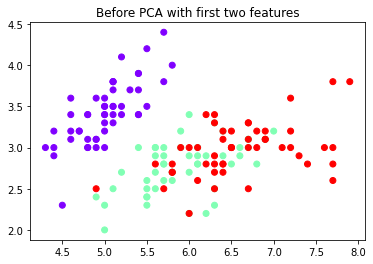

In [25]:
plt.scatter(X[:,0],X[:,1],c=iris.target,cmap='rainbow')
plt.title("Before PCA with first two features")

Reduce four features to two features by PCA, and visualize the projection. Seems it has two to three cluster here. We can see it is more spread out than before PCA.

Text(0.5, 1.0, 'After PCA')

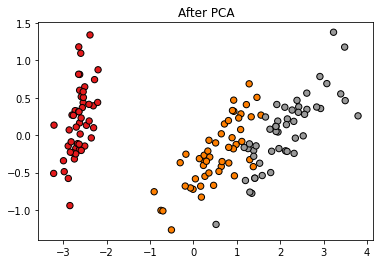

In [26]:
X_reduced = PCA(n_components=2).fit_transform(iris.data)
y=iris.target
plt.scatter(
    X_reduced[:,0],
    X_reduced[:,1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40,
)
plt.title("After PCA")

See the reduced two dim X

In [27]:
X_reduced[1]

array([-2.71414169, -0.17700123])

See X matrix dim

In [28]:
X_reduced.shape

(150, 2)

See how two dim X on the plane

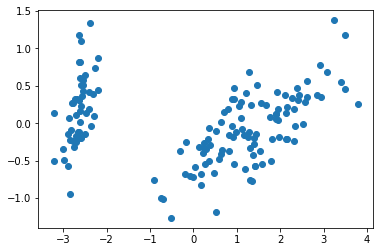

In [29]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])

Randomly select two points as the initial centroids

In [30]:
k = 2
C = []
for _ in range(k):
  i = np.random.randint(len(X_reduced))
  C.append(X_reduced[i,:])

See the position of two randomly selected centroids

In [31]:
C

[array([3.48705536, 1.17573933]), array([-2.61275523,  0.01472994])]

Define a function of euclidean distance

In [32]:
def distance(v,w):
  return np.sqrt((v-w)@(v-w))

see the euclidean distance between the first centroid and the first X

In [33]:
distance(C[0],X_reduced[0])

6.230312719108142

Define a function to calculate the distance between each points to the centroids and every points get the same number of distance with the same number of centroid, and for each points we will assign it to the nearest centroid, so for each point we need to find the samllest distance from the point to the centroid among other distance.

In [34]:
def assignment(x,Centroids):
  distances = np.array([distance(x,centroid) for centroid in Centroids])
  return np.argmin(distances)

See what cluster will the first point in X get assigned

In [35]:
assignment(X_reduced[0],C)

1

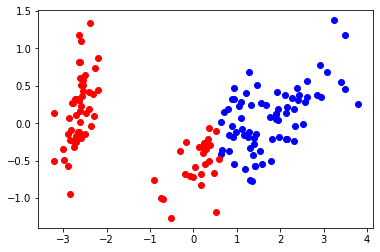

In [36]:
for x in X_reduced:
  if assignment(x,C) == 0:
    plt.scatter(x[0],x[1],color = 'blue')
  else:
    plt.scatter(x[0],x[1],color = 'red')
plt.show()


calculate distance for every points

In [37]:
def make_classes(data,Centroids):
  A = dict()
  for i in range(len(Centroids)):
    A[i] = []

  for x in data:
     A[assignment(x,Centroids)].append(x)
  return A

In [38]:
A = make_classes(X_reduced,C)

Calculate new centroid by taking the average of distances

In [39]:
def new_Centroids(data,Centroids):
  new_Centroids =[]
  A = make_classes(data,Centroids)
  for i in range(len(Centroids)):
    new_Centroids.append((1/len(A[i]))*sum(A[i]))

  return new_Centroids  

new centroid

In [40]:
new_C = new_Centroids(X_reduced,C)  

test if it moves

In [41]:
#
new_C

[array([1.76240554, 0.0685306 ]), array([-1.71602644, -0.06672716])]

now put everything together and see how centroids change with k =3 and with 3 iteration.

In [42]:
def initialize_centroids(data,k=2):
  Centroids =[]
  for _ in range(k):
    i = np.random.randint(len(X_reduced))
    Centroids.append(X_reduced[i,:])
  return Centroids

def assignment(x,Centroids):
  distances = np.array([distance(x,centroid) for centroid in Centroids])
  return np.argmin(distances)

def make_classes(data,Centroids):
  A = dict()
  for i in range(len(Centroids)):
    A[i] = []

  for x in data:
     A[assignment(x,Centroids)].append(x)
  return A

def new_centroids(data,Centroids):
  new_Centroids =[]
  A = make_classes(data,Centroids)
  for i in range(len(Centroids)):
    new_Centroids.append((1/len(A[i]))*sum(A[i]))
  return new_Centroids  

k=3
C0 = initialize_centroids(X_reduced,k=k)
C1 = new_centroids(X_reduced,C0)
C2 = new_centroids(X_reduced,C1)
C3 = new_centroids(X_reduced,C2)

Initial state

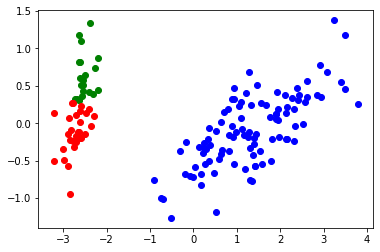

In [43]:
for x in X_reduced:
  if assignment(x,C0) == 0:
    plt.scatter(x[0],x[1],color='blue')
  elif assignment(x,C0) == 1:
    plt.scatter(x[0],x[1],color='green')
  else:
    plt.scatter(x[0],x[1],color='red')

Iterate once and new centroid

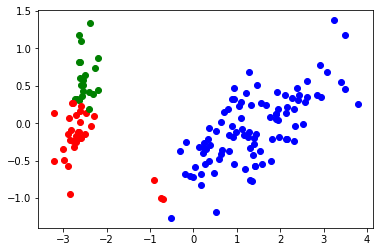

In [44]:
for x in X_reduced:
  if assignment(x,C1) == 0:
    plt.scatter(x[0],x[1],color='blue')
  elif assignment(x,C1) == 1:
    plt.scatter(x[0],x[1],color='green')
  else:
    plt.scatter(x[0],x[1],color='red')

put everything together again, and now we iterate at most 100 times and when the maximum centroid distance is equal to or less than 0.01, we will stop the iteration. And we also calculate mean square error (the distance between every points and their cluster centroids)

In [45]:
def initialize_centroids(data,k=2):
  Centroids =[]
  for _ in range(k):
    i = np.random.randint(len(X_reduced))
    Centroids.append(X_reduced[i,:])
  return Centroids

def assignment(x,Centroids):
  distances = np.array([distance(x,centroid) for centroid in Centroids])
  return np.argmin(distances)

def make_classes(data,Centroids):
  A = dict()
  for i in range(len(Centroids)):
    A[i] = []

  for x in data:
     A[assignment(x,Centroids)].append(x)
  return A

def new_centroids(data,Centroids):
  new_Centroids =[]
  A = make_classes(data,Centroids)
  for i in range(len(Centroids)):
    new_Centroids.append((1/len(A[i]))*sum(A[i]))
  return new_Centroids  

def fit(data, k=3, max_iterations=100, epsilon=0.01):
  C_old = initialize_centroids(data, k = k)
  C_new = new_centroids(data,C_old)
  centroid_distances = [distance(p[0],p[1]) for p in zip (C_old,C_new)]
  iterations = 0
  while max(centroid_distances) > epsilon  and iterations < max_iterations:
    C_old, C_new = C_new, new_centroids(data,C_new)
    centroid_distances = [distance(p[0],p[1]) for p in zip (C_old,C_new)]
    iterations += 1
  return C_new


def mse_classes(data,Centroids):
  errors = []
  A_classes = make_classes(data,Centroids)
  for i, centroid in enumerate(Centroids):

    error = sum(0.5*(centroid-a)@(centroid-a) for a in A_classes[i])
    errors.append(error)
  return sum(x for x in errors)

try when k=3 and see its MSE

In [46]:
C = fit(X_reduced)
print(mse_classes(X_reduced,C))

31.909971011000614


now we try different k and store in C

In [47]:
C1 = fit(X_reduced,k=1)
C2 = fit(X_reduced,k=2)
C3 = fit(X_reduced,k=3)
C4 = fit(X_reduced,k=4)
C5 = fit(X_reduced,k=5)
C6 = fit(X_reduced,k=6)
# C7 = fit(X,k=7)

C = [C2,C3,C4,C5,C6]

calculate MSE for different k and plot MSE as a function of k

#### Elbow method
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 6. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

Text(0.5, 1.0, 'Elbow method')

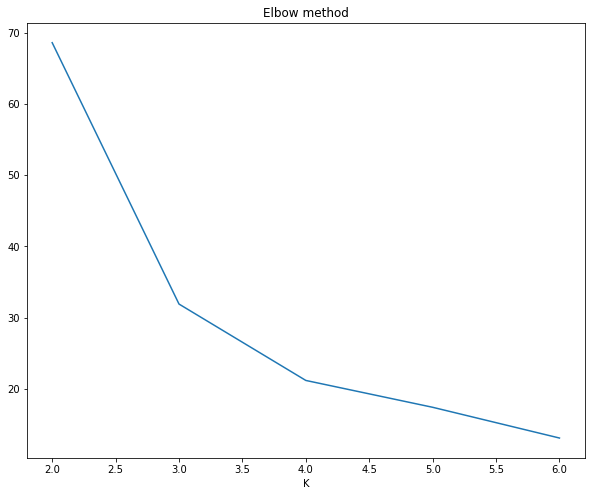

In [48]:
errors = [mse_classes(X_reduced,centroids) for centroids in C]
plt.figure(figsize=(10,8))
plt.plot([i for i in range(2,7)],errors)
plt.xlabel("K")
plt.title("Elbow method")

#### Conclusion
Here we will pick k=3 as our cluster, and which is close with our assumption when doing PCA. And in reality there are really 3 species in the dataset!

-------------------------------

### Implementation on Different Dataset
---------------------

#### Dataset Information
we will use [make_blobs dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) from sklearn.datasets.

I will generate the dataset from make_blobs dataset, with 400 observations and 4 features and 4 clusters with some noise around them. 

###### Our goal is to find the cluster of the data without looking the labels.

The packages we will use in the practice are:
* [matplotlib](https://matplotlib.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
* [mpl_toolkits](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html)
* [seaborn](https://seaborn.pydata.org/)
* [numpy](https://numpy.org/doc/)

Import libraries and create data

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import numpy as np

create 4 clusters, 400 observations, and 4 features. Extract features and put into X matrix. There are four features in X matrix

In [51]:
df = make_blobs(n_samples=400, n_features=4, centers=4, cluster_std=1.8,random_state=101)
X = df[0]
X[1]

array([-3.59479682,  5.39791086,  8.06721835, -4.10445201])

Look before PCA with the two features

Text(0.5, 1.0, 'Before PCA with first two features')

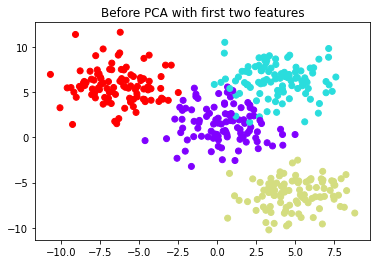

In [52]:
plt.scatter(df[0][:,0],df[0][:,1],c=df[1],cmap='rainbow')
plt.title("Before PCA with first two features")

Reduce four features to two features by PCA, and visualize the projection. It seems there may be 3 clusters. More spread out than before PCA

Text(0.5, 1.0, 'After PCA')

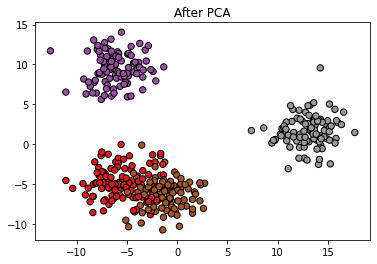

In [53]:
X_reduced = PCA(n_components=2).fit_transform(X)
y=df[1]
plt.scatter(
    X_reduced[:,0],
    X_reduced[:,1],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor='k',
    s=40,
)
plt.title("After PCA")

See the reduced two dim X

In [54]:
X_reduced[1]

array([10.43831179,  1.95509807])

In [55]:
X_reduced.shape

(400, 2)

See how two dim X on the plane

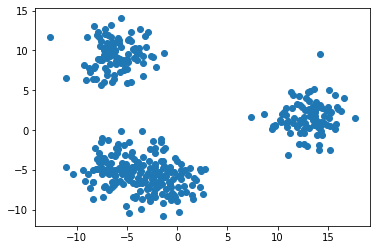

In [56]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])

Randomly select two points as the initial centroids

In [57]:
k = 2
C = []
for _ in range(k):
  i = np.random.randint(len(X_reduced))
  C.append(X_reduced[i,:])

See the position of two randomly selected centroids

In [58]:
C

[array([-8.92425887, 11.68885114]), array([-7.76523216, 11.64026202])]

Define a function of euclidean distance

In [59]:
def distance(v,w):
  return np.sqrt((v-w)@(v-w))

see the euclidean distance between the first centroid and the first X

In [60]:
distance(C[0],X_reduced[0])

25.691771898741102

Define a function to calculate the distance between each points to the centroids and every points get the same number of distance with the same number of centroid, and for each points we will assign it to the nearest centroid, so for each point we need to find the samllest distance from the point to the centroid among other distance.

In [61]:
def assignment(x,Centroids):
  distances = np.array([distance(x,centroid) for centroid in Centroids])
  return np.argmin(distances)

See what cluster will the first point in X get assigned

In [62]:
assignment(X_reduced[0],C)

1

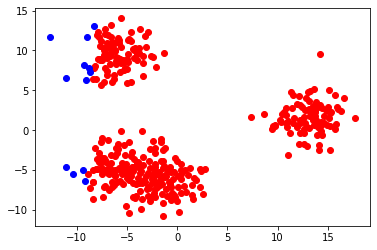

In [63]:
for x in X_reduced:
  if assignment(x,C) == 0:
    plt.scatter(x[0],x[1],color = 'blue')
  else:
    plt.scatter(x[0],x[1],color = 'red')
plt.show()

calculate distance for every points

In [64]:
def make_classes(data,Centroids):
  A = dict()
  for i in range(len(Centroids)):
    A[i] = []

  for x in data:
     A[assignment(x,Centroids)].append(x)
  return A

In [67]:
A = make_classes(X_reduced,C)
A[1][1]

array([10.43831179,  1.95509807])

Calculate new centroid by taking the average of distances

In [68]:
def new_Centroids(data,Centroids):
  new_Centroids =[]
  A = make_classes(data,Centroids)
  for i in range(len(Centroids)):
    new_Centroids.append((1/len(A[i]))*sum(A[i]))

  return new_Centroids 

now put everything together and see how centroids change with k =3 and with 3 iteration.

In [69]:
def initialize_centroids(data,k=2):
  Centroids =[]
  for _ in range(k):
    i = np.random.randint(len(X_reduced))
    Centroids.append(X_reduced[i,:])
  return Centroids

def assignment(x,Centroids):
  distances = np.array([distance(x,centroid) for centroid in Centroids])
  return np.argmin(distances)

def make_classes(data,Centroids):
  A = dict()
  for i in range(len(Centroids)):
    A[i] = []

  for x in data:
     A[assignment(x,Centroids)].append(x)
  return A

def new_centroids(data,Centroids):
  new_Centroids =[]
  A = make_classes(data,Centroids)
  for i in range(len(Centroids)):
    new_Centroids.append((1/len(A[i]))*sum(A[i]))
  return new_Centroids  

k=3
C0 = initialize_centroids(X_reduced,k=k)
C1 = new_centroids(X_reduced,C0)
C2 = new_centroids(X_reduced,C1)
C3 = new_centroids(X_reduced,C2)

Initial state with k=3

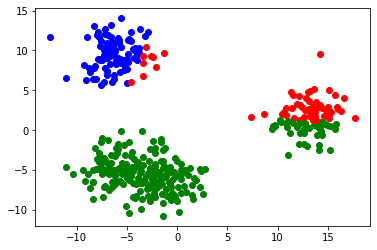

In [70]:
for x in X_reduced:
  if assignment(x,C0) == 0:
    plt.scatter(x[0],x[1],color='blue')
  elif assignment(x,C0) == 1:
    plt.scatter(x[0],x[1],color='green')
  else:
    plt.scatter(x[0],x[1],color='red')

Iterate once and new centroid, and it looks better.

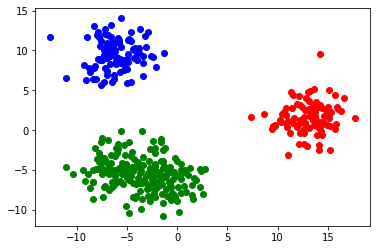

In [71]:
for x in X_reduced:
  if assignment(x,C1) == 0:
    plt.scatter(x[0],x[1],color='blue')
  elif assignment(x,C1) == 1:
    plt.scatter(x[0],x[1],color='green')
  else:
    plt.scatter(x[0],x[1],color='red')

put everything together again, and now we iterate at most 100 times and when the maximum centroid distance is equal to or less than 0.01, we will stop the iteration. And we also calculate mean square error (the distance between every points and their cluster centroids)

In [72]:
def initialize_centroids(data,k=2):
  Centroids =[]
  for _ in range(k):
    i = np.random.randint(len(X_reduced))
    Centroids.append(X_reduced[i,:])
  return Centroids

def assignment(x,Centroids):
  distances = np.array([distance(x,centroid) for centroid in Centroids])
  return np.argmin(distances)

def make_classes(data,Centroids):
  A = dict()
  for i in range(len(Centroids)):
    A[i] = []

  for x in data:
     A[assignment(x,Centroids)].append(x)
  return A

def new_centroids(data,Centroids):
  new_Centroids =[]
  A = make_classes(data,Centroids)
  for i in range(len(Centroids)):
    new_Centroids.append((1/len(A[i]))*sum(A[i]))
  return new_Centroids  

def fit(data, k=3, max_iterations=100, epsilon=0.01):
  C_old = initialize_centroids(data, k = k)
  C_new = new_centroids(data,C_old)
  centroid_distances = [distance(p[0],p[1]) for p in zip (C_old,C_new)]
  iterations = 0
  while max(centroid_distances) > epsilon  and iterations < max_iterations:
    C_old, C_new = C_new, new_centroids(data,C_new)
    centroid_distances = [distance(p[0],p[1]) for p in zip (C_old,C_new)]
    iterations += 1
  return C_new


def mse_classes(data,Centroids):
  errors = []
  A_classes = make_classes(data,Centroids)
  for i, centroid in enumerate(Centroids):

    error = sum(0.5*(centroid-a)@(centroid-a) for a in A_classes[i])
    errors.append(error)
  return sum(x for x in errors)

now we try different k and store in C

In [73]:
C1 = fit(X_reduced,k=1)
C2 = fit(X_reduced,k=2)
C3 = fit(X_reduced,k=3)
C4 = fit(X_reduced,k=4)
C5 = fit(X_reduced,k=5)
C6 = fit(X_reduced,k=6)
# C7 = fit(X_reduced,k=7)

C = [C2,C3,C4,C5,C6]

calculate MSE for different k and plot MSE as a function of k, and apply Elbow method

Text(0.5, 1.0, 'Elbow method')

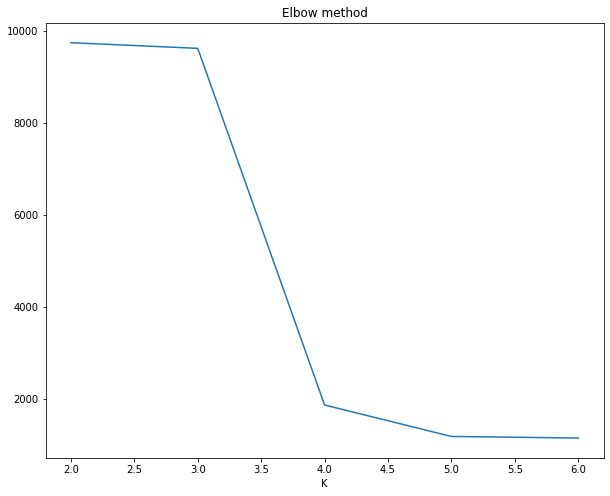

In [74]:
errors = [mse_classes(X_reduced,centroids) for centroids in C]
plt.figure(figsize=(10,8))
plt.plot([i for i in range(2,7)],errors)
plt.xlabel("K")
plt.title("Elbow method")

#### Conclustion
After applying elbow method, we will choose k=4, adn it does match with our true labels that it has 4 centers!

#### References
Jaadi, Z. (n.d.). A step-by-step explanation of principal component analysis (PCA). Built In. Retrieved November 11, 2021, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis.  

Garbade, D. M. J. (2018, September 12). Understanding K-means clustering in machine learning. Medium. Retrieved November 11, 2021, from https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1. 

K means clustering: K means clustering algorithm in machine learning. Analytics Vidhya. (2021, January 22). Retrieved November 11, 2021, from https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/. 
